Подгружаем библиотеки

In [4]:
import json
import logging
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

Создаем логирование

In [5]:
logging.basicConfig(level=logging.INFO, 
                    filename="main_logs.log", 
                    format="%(asctime)s %(levelname)s %(message)s",
                    filemode="w")
logging.info("Program started, libs imported")

Определяем функции

In [8]:
# Функция для определения формы фигуры
def drawShape(shape_data):
    shape_type = shape_data.get('type')
    shape_type = shape_type.title()
    draw_figure_name = 'draw' + shape_type

    try:
        draw_func_name = globals()[draw_figure_name] # Получение функции по имени из глобальных переменных
        draw_func_name(shape_data)
    except Exception as e:
        logging.error(f"Error in draw shape: {e}")
        return

# Отрисовка прямоугольника
def drawRectangle(rectangle_data):
    x = rectangle_data.get('x')
    y = rectangle_data.get('y')
    height = rectangle_data.get('height')
    width = rectangle_data.get('width')
    color = rectangle_data.get('color', 'blue')
    if x is None or y is None or height is None or width is None:
        logging.error(f"Height or width is None in {rectangle_data.get('type')}")
        return

    rectangle = Rectangle((x, y), width, height, edgecolor=color, fill=False)
    plt.gca().add_patch(rectangle)
    logging.info(f"Add rectangle with parametres [{x}, {y}], height = {height}, width = {width}, color = {color}")
    
# Отрисовка фигуры по произвольным точкам
def drawOther(triangle_data):
    points = triangle_data.get('points')
    color = triangle_data.get('color', 'green')
    if points is None:
        logging.error(f"Points are None in {triangle_data.get('type')}")

    triangle = Polygon(points, closed=True, edgecolor=color, fill=False)
    plt.gca().add_patch(triangle)
    logging.info(f"Add figure other type {points}")

Основная часть с выполнением задачи

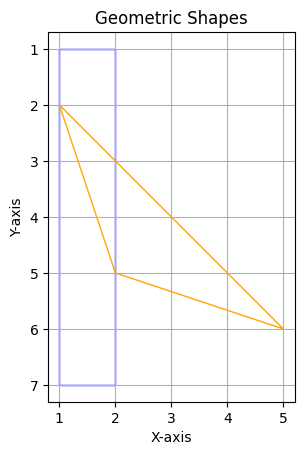

In [14]:
def main():

    # Открытие файла и вытаскиваение данных
    file_name = 'shapes.json'
    try:
        with open(file_name) as f:
            data = json.load(f)
    except FileNotFoundError:
        logging.error(f"File {file_name} not found!")
        return
    except json.JSONDecodeError:
        logging.error(f"Error decoding JSON file {file_name}")
        return
    except Exception as e:
        logging.error(f"Error in open file {file_name}. Exception is {e}")
        return
    logging.info("File loaded")

    # Создание нового объекта фигуры
    plt.figure()

    # Отрисовка фигуры
    shape_data = data.get('shapes', [])
    if not shape_data: # Проверяем наличие списка фигур, если нет, фиксируем шибку и завершаем пограмму
        logging.error(f"No shapes in data")
        return
    
    for shape_data in data['shapes']: # Цикл проходит по всему shapes и отрабатывает все фигуры, даже если их будет 10 - 20 программа отрисует все
        try:
            drawShape(shape_data)
        except Exception as e:
            logging.error(f"Build shape exception: {e} in {shape_data.get('type')}")
            continue

    try:
        plt.axis('equal')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        plt.title('График с фигурами')
        plt.xlabel('ось X')
        plt.ylabel('ось Y')
        plt.show()

        logging.info("Program finished successfully")
    except Exception as e:
        logging.error(f"Drawing shape exception: {e}")
        return
    
if __name__ == "__main__":
    main()